# 1 Import and Init

# 1.1 Python and Stuffs

In [22]:
import numpy as np
import random as rd
#Fixer les graines des mes différenets générateurs de nombres aleatoires afin de rendre mes resultats reproductibles
np.random.seed(0)
rd.seed(0)
import warnings
# Ignorer tous les avertissements
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
import tensorflow as tf
import tensorflow_hub as hub

In [24]:
print("TF Version: ", tf.__version__)
print("Hub version: ", hub.__version__)

TF Version:  2.16.1
Hub version:  0.16.1


#  1.1.1 Part 1 :Install TensorFlow and TensorFlow Model Garden


In [21]:
import tensorflow as tf
print(tf.version.VERSION)

2024-04-17 13:59:18.569597: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-17 13:59:18.570486: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 13:59:18.576241: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 13:59:18.641732: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 13:59:19.934561

2.16.1


In [ ]:
# !pip install -q tensorflow==2.3.0


## 1.2 set parametric values

In [2]:
# filesystem
input_dir="/home/onyxia/work/NLP_DSSA_ENSAE/Predict_Sex_Project/Data/"
output_dir="/home/onyxia/work/NLP_DSSA_ENSAE/Predict_Sex_Project/Outputs/"
codes_dir="/home/onyxia/work/NLP_DSSA_ENSAE/Predict_Sex_Project/Codes/"
file1="firstname_with_sex.csv"
file2="transcriptions_with_sex.csv"
# preprocessing
scale=0.2
# Python interpretatot
path_python="/home/onyxia/work/NLP_DSSA_ENSAE/Predict_Sex_Project/Codes/PredictSex_env/bin/python"

#model

# 2 Load , Analyse, Save Data

## 2.1  firstname_with_sex Data

In [3]:
df1=pd.read_csv(input_dir+file1,sep=";")


In [4]:
df1.head(5)

,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6946 entries, 0 to 6945
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   firstname  6946 non-null   object
 1   male       6946 non-null   int64 
 2   female     6946 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 162.9+ KB


In [6]:
dataset_FN=df1.copy() # FT =Fisrtname


In [7]:
dataset_FN.head(2)

,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476


In [10]:
def male_part_fun(df,sex_col=["male","female"],name_="male_part"):
    df[name_]=df[sex_col[0]]/(df[sex_col[0]]+df[sex_col[1]])
    df_transformed=df.drop(sex_col,axis=1).copy()
    return df_transformed

In [11]:
FirstName_df=male_part_fun(dataset_FN)
FirstName_df.head(2)

,firstname,male_part
0,marie,0.004226
1,jean,0.996548


## 1.2  transcriptions_with_sex Data

In [30]:
df2=pd.read_csv(input_dir+file2,sep=",")


In [31]:
df2.head(2)

,subject_line,groundtruth,prediction,sex
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: ...,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupa...,nom: Lhopital prénom: Louis Jean date_naissanc...,homme


In [17]:
df2.columns

Index(['subject_line', 'groundtruth', 'prediction', 'sex'], dtype='object')

In [15]:
print(df2.prediction[2],"\n")
print(df2.groundtruth[2])

nom: Pyrin prénom: Marie date_naissance: 55 relation: d  

surname: Papin firstname: Marie occupation: idem link: idem employer: idem age: 15 


In [18]:
def get_work_df(df,col_to_rm=['subject_line', 'groundtruth']):

    transcription_df=df.drop(col_to_rm,axis=1).copy()
    return transcription_df

In [32]:
transcription_df=get_work_df(df2)
transcription_df.head(2)

,prediction,sex
0,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,nom: Lhopital prénom: Louis Jean date_naissanc...,homme


In [35]:
def Binarizer(df,col_to_biner="sex",modality="homme"):
    new_col_name="num_"+col_to_biner
    df[new_col_name]=0
    df[new_col_name][df[col_to_biner]==modality]=1
    work_df=df.drop([col_to_biner],axis=1).copy()
    return work_df

In [37]:
work_df=Binarizer(transcription_df)
work_df.head(3)

,prediction,num_sex
0,nom: Chardon prénom: Marie date_naissance: 30 ...,0
1,nom: Lhopital prénom: Louis Jean date_naissanc...,1
2,nom: Pyrin prénom: Marie date_naissance: 55 re...,0


<Axes: title={'center': 'Sexe Distribution'}, ylabel='Frequency'>

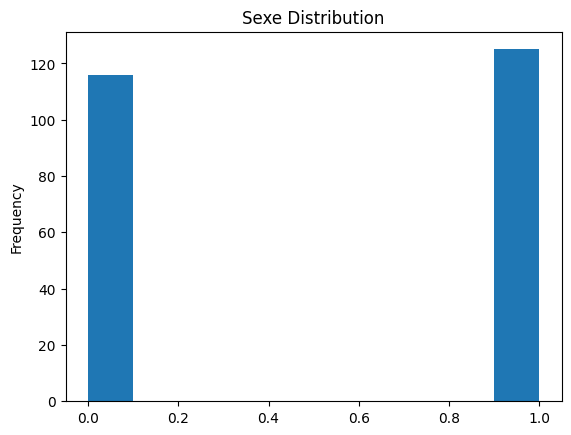

In [39]:
work_df.num_sex.plot(kind='hist',title='Sexe Distribution')


Task 4: Create tf.data.Datasets for Training and Evaluation


In [42]:
from sklearn.model_selection import  train_test_split
train_df,remaining = train_test_split(work_df,random_state=42,train_size=0.75,stratify=work_df.num_sex.values)
valid_df,_ = train_test_split(remaining,random_state=42,train_size=0.75,stratify=remaining.num_sex.values)
train_df.shape,valid_df.shape

((180, 2), (45, 2))

In [43]:
train_df.columns

Index(['prediction', 'num_sex'], dtype='object')

In [46]:
def col_renamer(df,old_name=['prediction', 'num_sex'],new_name=['text','target']):
    keys = old_name
    values = new_name

# Créer un dictionnaire à partir des deux listes
    dictionary = dict(zip(keys, values))
    df.rename(columns=dictionary,inplace=True)

In [47]:
col_renamer(train_df)
train_df.columns

Index(['text', 'target'], dtype='object')

In [48]:
col_renamer(valid_df)
valid_df.columns

Index(['text', 'target'], dtype='object')

In [52]:
def convert_df_to_tensoor(df):
    df_transform = tf.data.Dataset.from_tensor_slices((df.text.values, df.target.values))
    return df_transform


In [53]:
train_data=convert_df_to_tensoor(train_df)
valid_data=convert_df_to_tensoor(valid_df)

In [56]:

  for text, target in train_data.take(1):
    print(text)
    print(target)

tf.Tensor(b'nom: Jean pr\xc3\xa9nom: Jean date_naissance: 20 lieux_naissance: s relation: enfant ', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)


2024-04-17 14:55:59.637858: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [59]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git


Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [61]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
#from official.nlp import optimization

Task 5: Download a Pre-trained BERT Model from TensorFlow Hub


In [57]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

'\nEach line of the dataset is composed of the review text and its label\n- Data preprocessing consists of transforming text to BERT input features:\ninput_word_ids, input_mask, segment_ids\n- In the process, tokenizing the text is done with the provided BERT model tokenizer\n'

In [62]:
# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [77]:
max_seq_length=transcription_df.prediction.apply(len).max()
max_seq_length

168

In [79]:
transcription_df.iloc[:10,:].to_csv("Test_word_embedding.csv")

In [74]:
tokenizer.wordpiece_tokenizer.tokenize(test)


['no',
 '##m',
 '##:',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 'date',
 '##_',
 '##nais',
 '##san',
 '##ce',
 '##:',
 '67',
 'lieu',
 '##x',
 '##_',
 '##nais',
 '##san',
 '##ce',
 '##:',
 '[UNK]',
 'employ',
 '##eur',
 '##:',
 'ah',
 '##ef']

# Task 6: Tokenize and Preprocess Text for BERT


In [64]:
label_list = [0, 1] # Label categories
max_seq_length = 128 # maximum length of (token) input sequences
train_batch_size = 32

In [65]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                            text_a = text.numpy(), 
                                            text_b = None, 
                                            label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)
  
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution


In [66]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], 
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])

  # py_func doesn't set the shape of the returned tensors.
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
    }
  return (x, label_id)

In [67]:
# train
train_data = (train_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          #.cache()
                          .shuffle(1000)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
valid_data = (valid_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE)) 

In [69]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [16]:
columns=df2.columns
dataset_T=df2[columns[-2:]].copy() # T =Transcription
dataset_T.head(2)

,prediction,sex
0,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,nom: Lhopital prénom: Louis Jean date_naissanc...,homme
